In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data= pd.read_csv(('/content/drive/MyDrive/home-credit-default-risk/application_train.csv'))
data



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Mengecek tipe data kolom
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']

# Menampilkan hanya kolom-kolom yang bersifat kategorikal
categorical_data = data[categorical_columns]

print("Data Kategorikal:")
print(categorical_data)

Data Kategorikal:
       NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / seco

In [4]:
# Mengecek tipe data kolom
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']

# Menghapus kolom-kolom yang bersifat kategorikal
data_cleaned = data.drop(columns=categorical_columns)

print("Data setelah menghapus kolom-kolom kategorikal:")
print(data_cleaned)

Data setelah menghapus kolom-kolom kategorikal:
        SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIV

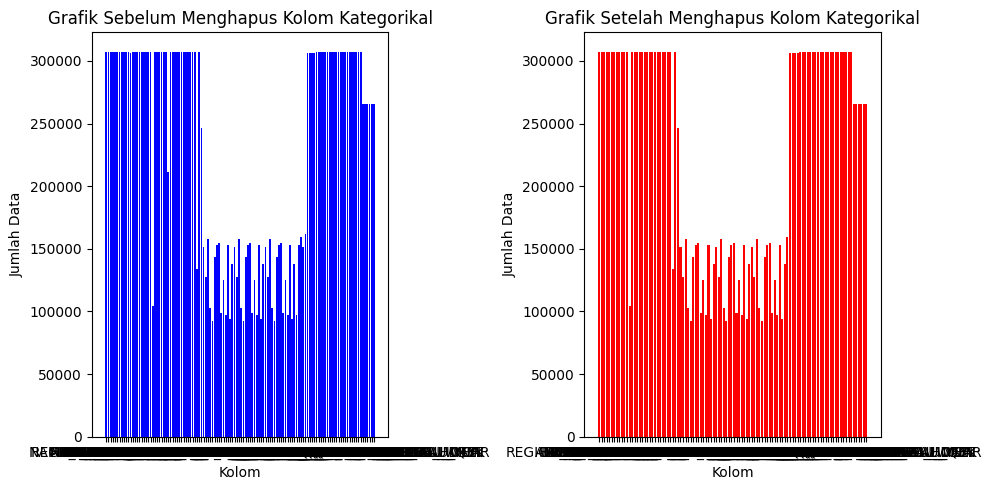

In [5]:
# Data sebelum menghapus kolom kategorikal
sebelum_menghapus = data.count()

# Data setelah menghapus kolom kategorikal
setelah_menghapus = data_cleaned.count()

# Plot grafik sebelum menghapus kolom kategorikal
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(sebelum_menghapus.index, sebelum_menghapus.values, color='blue')
plt.title('Grafik Sebelum Menghapus Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Data')

# Plot grafik setelah menghapus kolom kategorikal
plt.subplot(1, 2, 2)
plt.bar(setelah_menghapus.index, setelah_menghapus.values, color='red')
plt.title('Grafik Setelah Menghapus Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Data')

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [6]:
banyak_data = len(data_cleaned)
print('Banyak Data  = ',banyak_data)
jumlah_missingvalue = data_cleaned.isna().sum()
print("====== JUMLAH MISSING VALUE======\n",jumlah_missingvalue)

Banyak Data  =  307511
====== JUMLAH MISSING VALUE======
 SK_ID_CURR                        0
TARGET                            0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 106, dtype: int64


In [7]:
# Menghitung median untuk setiap kolom
median_per_kolom = data_cleaned.median()

# Mengisi nilai kosong dengan median dari setiap kolom
dataset = data_cleaned.fillna(median_per_kolom)

print("DataFrame setelah mengisi nilai kosong dengan median:")
print(dataset)

DataFrame setelah mengisi nilai kosong dengan median:
        SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_R

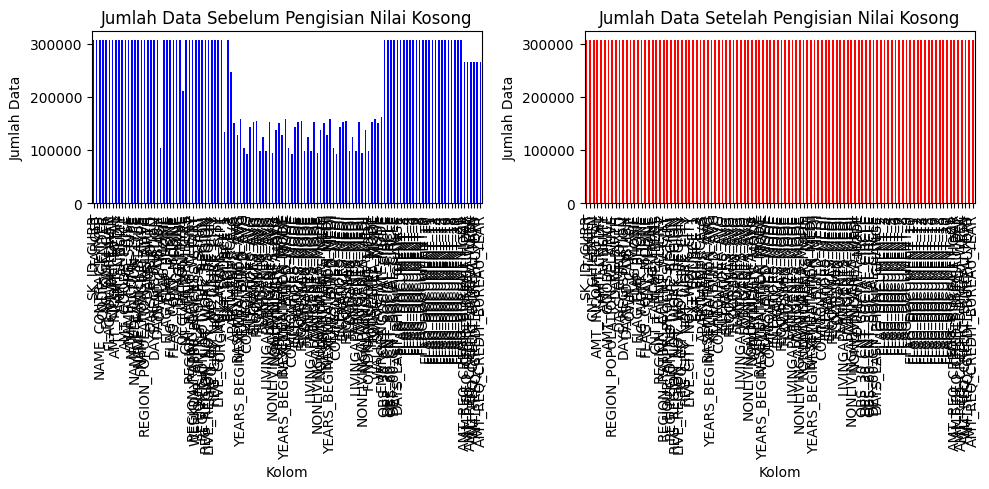

In [22]:
# Membuat grafik sebelum pengisian nilai kosong
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data.count().plot(kind='bar', color='blue')
plt.title('Jumlah Data Sebelum Pengisian Nilai Kosong')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Data')

# Membuat grafik setelah pengisian nilai kosong
plt.subplot(1, 2, 2)
dataset.count().plot(kind='bar', color='red')
plt.title('Jumlah Data Setelah Pengisian Nilai Kosong')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Data')

# Menampilkan grafik
plt.tight_layout()
plt.show()



In [8]:
cols_to_normalize = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
dataset[cols_to_normalize] = dataset[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
dataset


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,0.001512,0.090287,0.090032,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0.002089,0.311736,0.132924,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,0.000358,0.022472,0.020025,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0.000935,0.066837,0.109477,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,0.000819,0.116854,0.078975,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0.001127,0.052360,0.101176,225000.0,0.032561,-9327,-236,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,0,0.000396,0.056067,0.040505,225000.0,0.025164,-20775,365243,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,0,0.001089,0.157969,0.110618,585000.0,0.005002,-14966,-7921,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,0.001243,0.081175,0.072499,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


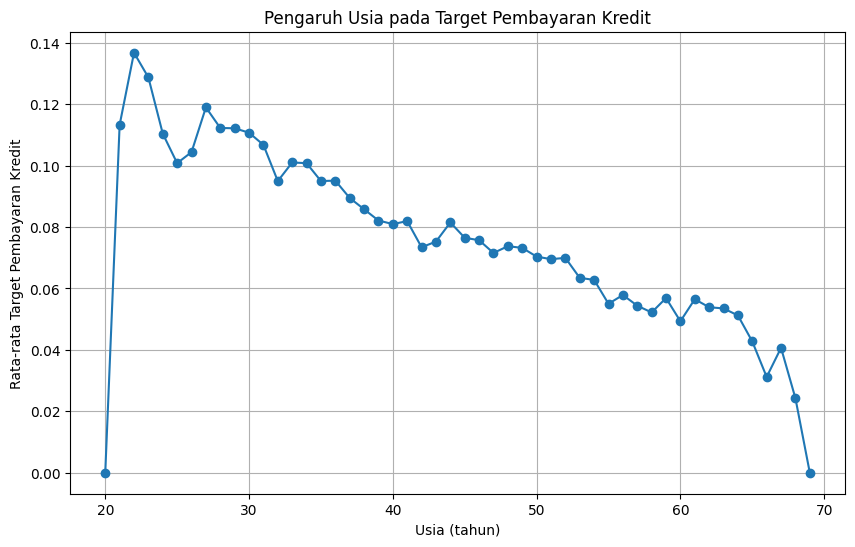

In [9]:
# Menghitung usia dalam tahun dari DAYS_BIRTH (diasumsikan DAYS_BIRTH menyatakan umur dalam hari)
dataset['AGE'] = -dataset['DAYS_BIRTH'] // 365

# Mengelompokkan data berdasarkan usia dan menghitung rata-rata target pembayaran kredit
age_grouped = dataset.groupby('AGE')['TARGET'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(age_grouped['AGE'], age_grouped['TARGET'], marker='o', linestyle='-')
plt.title('Pengaruh Usia pada Target Pembayaran Kredit')
plt.xlabel('Usia (tahun)')
plt.ylabel('Rata-rata Target Pembayaran Kredit')
plt.grid(True)
plt.show()


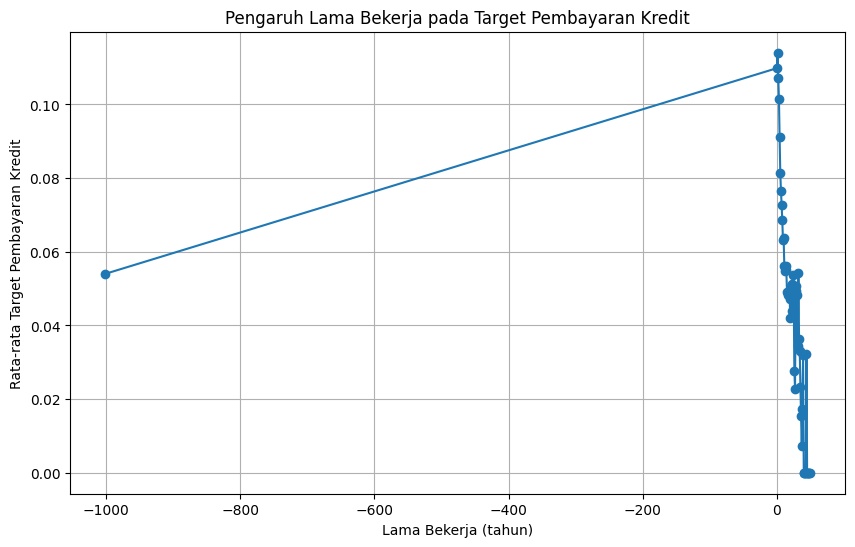

In [10]:
# Menghitung lama bekerja dalam tahun dari DAYS_EMPLOYED (diasumsikan DAYS_EMPLOYED menyatakan lama bekerja dalam hari)
dataset['YEARS_EMPLOYED'] = -dataset['DAYS_EMPLOYED'] // 365

# Mengelompokkan data berdasarkan lama bekerja dan menghitung rata-rata target pembayaran kredit
employed_grouped = dataset.groupby('YEARS_EMPLOYED')['TARGET'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(employed_grouped['YEARS_EMPLOYED'], employed_grouped['TARGET'], marker='o', linestyle='-')
plt.title('Pengaruh Lama Bekerja pada Target Pembayaran Kredit')
plt.xlabel('Lama Bekerja (tahun)')
plt.ylabel('Rata-rata Target Pembayaran Kredit')
plt.grid(True)
plt.show()


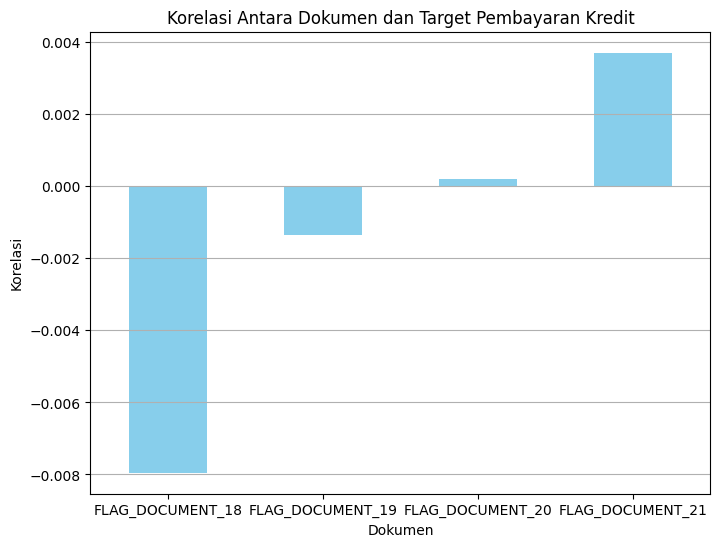

In [11]:
# Membuat dataframe hanya dengan kolom yang dibutuhkan
doc_columns = ['FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'TARGET']
doc_df = dataset[doc_columns]

# Menghitung korelasi antara dokumen-dokumen dan target pembayaran kredit
correlation = doc_df.corr()['TARGET'].drop('TARGET')

# Plotting
plt.figure(figsize=(8, 6))
correlation.plot(kind='bar', color='skyblue')
plt.title('Korelasi Antara Dokumen dan Target Pembayaran Kredit')
plt.xlabel('Dokumen')
plt.ylabel('Korelasi')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

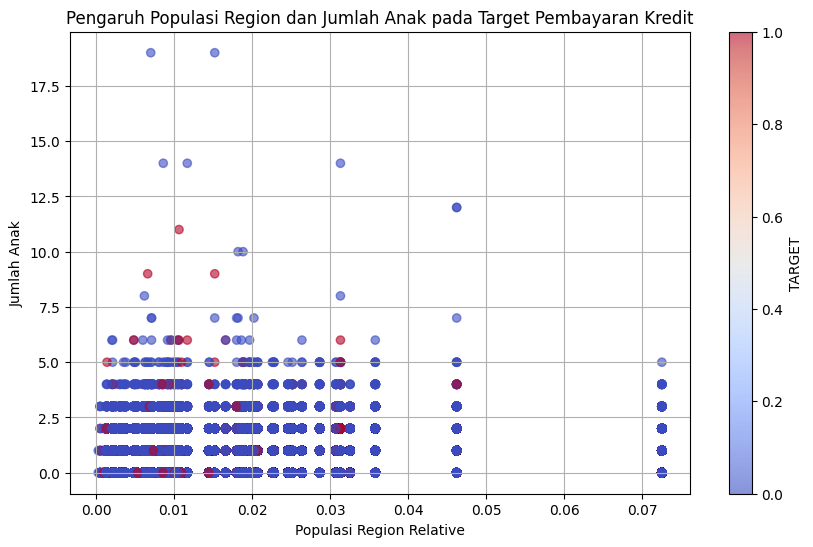

In [12]:
# Scatter plot untuk menganalisis hubungan antara populasi region, jumlah anak, dan target pembayaran kredit
plt.figure(figsize=(10, 6))
plt.scatter(dataset['REGION_POPULATION_RELATIVE'], dataset['CNT_CHILDREN'], c=dataset['TARGET'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='TARGET')
plt.title('Pengaruh Populasi Region dan Jumlah Anak pada Target Pembayaran Kredit')
plt.xlabel('Populasi Region Relative')
plt.ylabel('Jumlah Anak')
plt.grid(True)
plt.show()

In [13]:
# Pemilihan fitur
X = dataset[['REGION_POPULATION_RELATIVE', 'CNT_CHILDREN']]
y = dataset['TARGET']

# Pembagian dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Memprediksi target pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model:", accuracy)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi Model: 0.9195323805342829

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Pemilihan fitur
selected_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                     'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
X = dataset[selected_features]
y = dataset['TARGET']

# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi target pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficient of Determination (R^2 Score):", r2)


Mean Squared Error: 0.07357911405682534
Coefficient of Determination (R^2 Score): 0.00558796053613031
